In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
import os

warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')  # Updated compatible name

# === 1. Load Data ===
data_path = "../data/Mall_Customers.csv"
df = pd.read_csv(data_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# === 2. Basic Info + Preprocessing ===

df.info()
df.isnull().sum()

# Drop ID and encode gender
df.drop("CustomerID", axis=1, inplace=True)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Choose relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


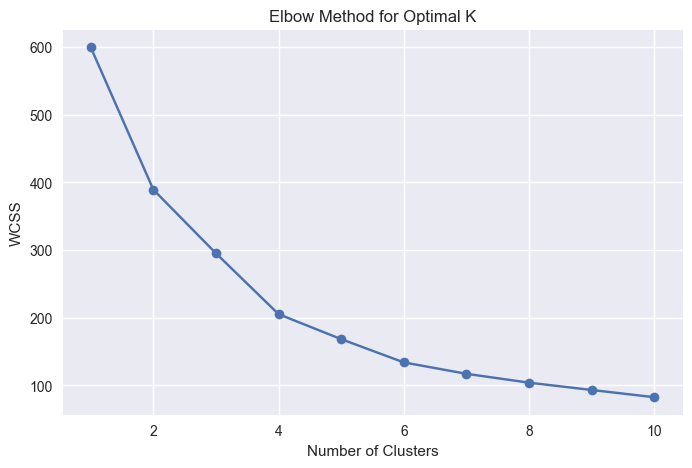

In [6]:
# === 3. Elbow Method to Find Optimal k ===

wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)

# Save to outputs
os.makedirs("../outputs", exist_ok=True)
plt.savefig("../outputs/elbow_curve.png")
plt.show()


In [7]:
# === 4. Fit Final KMeans with Chosen k ===

optimal_k = 5  # you can adjust based on elbow
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = labels
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,0
3,0,23,16,77,1
4,0,31,17,40,1


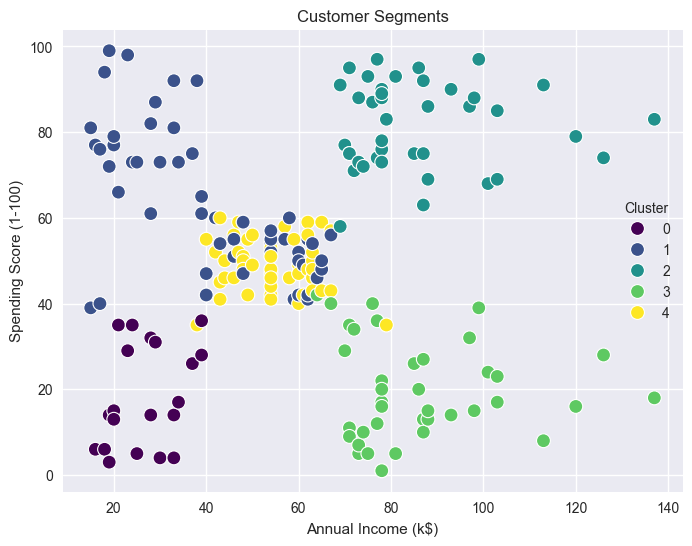

In [8]:
# === 5. Cluster Visualization (2D) ===

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segments")
plt.grid(True)
plt.savefig("../outputs/customer_clusters.png")
plt.show()
